In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Tamaño de la imagen: (alto, ancho, canales)
(480, 640, 3)
Cuadros por segundo: 30.0


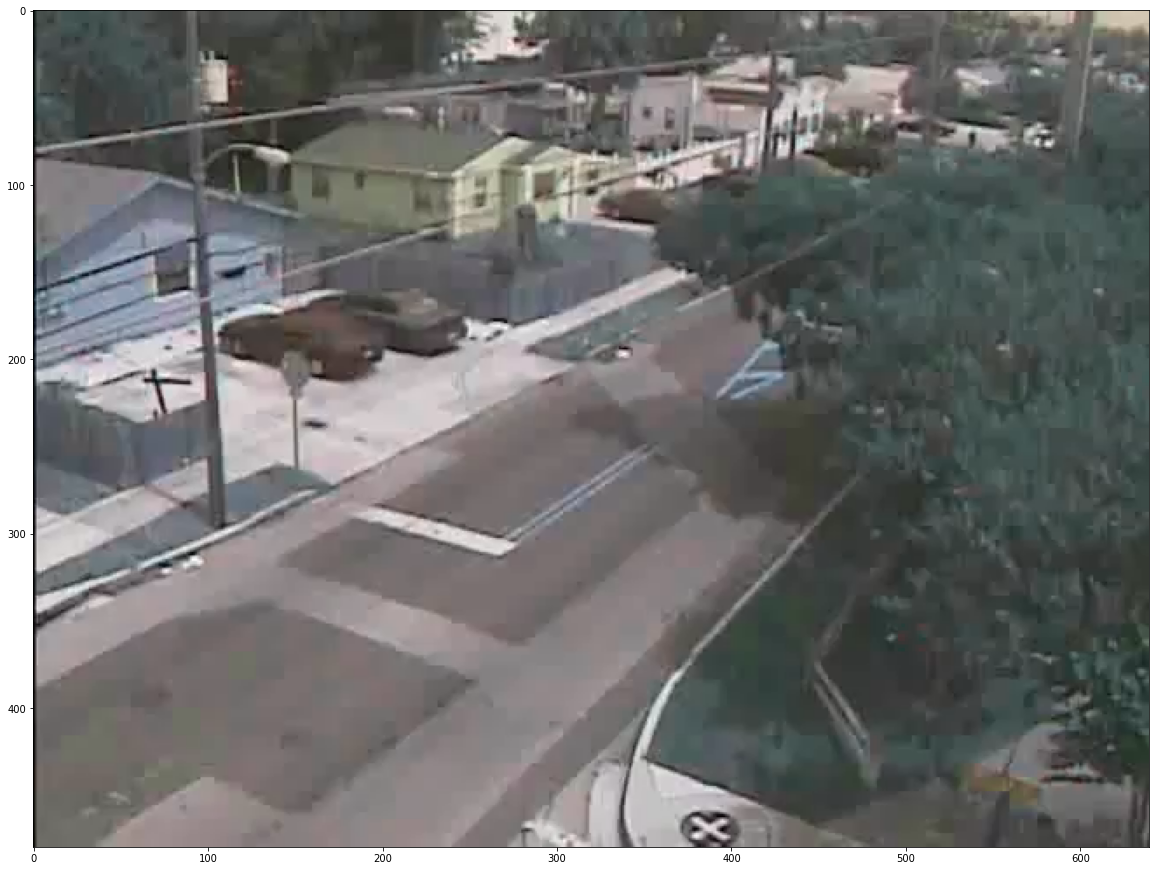

In [8]:
videoCaptura = cv2.VideoCapture('example.mp4')
fps = videoCaptura.get(cv2.CAP_PROP_FPS)
exito, frameAnterior = videoCaptura.read()

print("Tamaño de la imagen: (alto, ancho, canales)")
print(frameAnterior.shape)

plt.figure(figsize=(20, 20))
plt.imshow(frameAnterior)
print("Cuadros por segundo: " + str(fps))

In [9]:
movementVideoFrames = []

while exito:
    exito, frameActual = videoCaptura.read()
    if(exito):
        movimientoFrame = cv2.absdiff(frameActual, frameAnterior)
        movementVideoFrames.append(movimientoFrame)
        frameAnterior = frameActual
        
videoCaptura.release()

In [10]:
height, width, layers = movementVideoFrames[0].shape

fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
videoEscritor = cv2.VideoWriter('movement.mp4', fourcc, fps, (int(width), int(height)))

for counter in range(len(movementVideoFrames)):
    videoEscritor.write(movementVideoFrames[counter])
videoEscritor.release()
videoEscrito = cv2.VideoWriter('', fourcc, fps, (int(width), int()))